In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# We will load boston house price datasets
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)

In [20]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [21]:
print(housing.target)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [22]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [23]:
housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [26]:
housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [27]:
housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


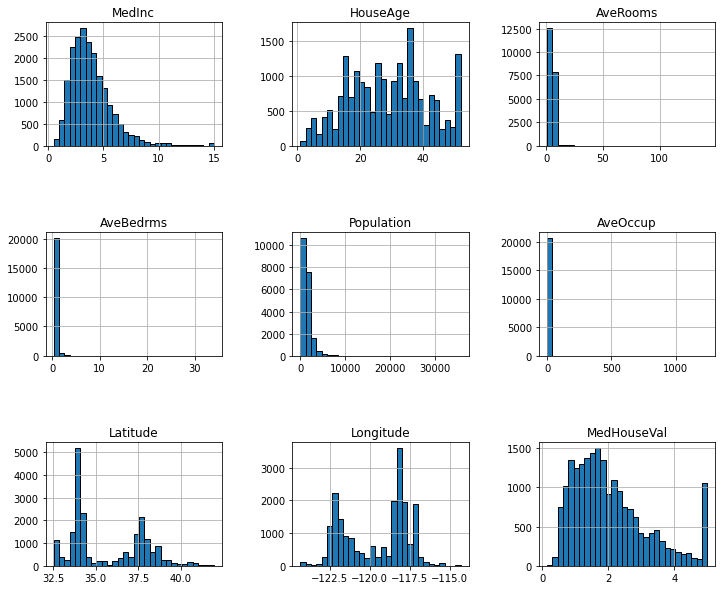

In [28]:
housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [30]:
feature_select = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
housing.frame[feature_select].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


In [35]:
X = housing.frame[["HouseAge", "AveRooms", "AveBedrms", "Population", "Population"]]

In [36]:
y = housing.target

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
X_test

,HouseAge,AveRooms,AveBedrms,Population,Population
20046,25.0,4.192201,1.022284,1392.0,1392.0
3024,30.0,5.039384,1.193493,1565.0,1565.0
15663,52.0,3.977155,1.185877,1310.0,1310.0
20484,17.0,6.163636,1.020202,1705.0,1705.0
9814,34.0,5.492991,1.028037,1063.0,1063.0
...,...,...,...,...,...
17505,47.0,4.195833,1.020833,581.0,581.0
13512,41.0,4.551852,1.118519,994.0,994.0
10842,16.0,3.762287,1.075614,5014.0,5014.0
16559,10.0,5.502092,1.060371,5935.0,5935.0


In [51]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score


def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()


def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [43]:
# Linear Regression 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

e:\freelance\greynodes\assignments\venv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [44]:
lin_reg.intercept_

2.0692396089424143

In [45]:
lin_reg.coef_

array([ 2.01215405e-01,  8.44797359e-01, -7.49953298e-01, -2.34524721e+12,
        2.34524721e+12])

In [46]:
# print the intercept
print(lin_reg.intercept_)

2.0692396089424143


In [47]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
HouseAge,2.012154e-01
AveRooms,8.447974e-01
AveBedrms,-7.499533e-01
Population,-2.345247e+12
Population,2.345247e+12


In [48]:
pred = lin_reg.predict(X_test)

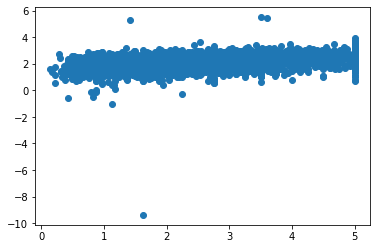

In [49]:
plt.scatter(y_test, pred)

In [52]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.8193267823494511
MSE: 1.1049190724041416
RMSE: 1.0511513080447275
R2 Square 0.15818262175281683
Train set evaluation:
_____________________________________
MAE: 0.8322078361638134
MSE: 1.1248847978193994
RMSE: 1.060605863560729
R2 Square 0.16034322955711233


In [53]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.819327,1.104919,1.051151,0.158183,-0.082638


In [54]:
# Ridge Regression

from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.819766489448294
MSE: 1.103625894451481
RMSE: 1.0505360034056335
R2 Square 0.15916787008539124
Train set evaluation:
_____________________________________
MAE: 0.832647881704121
MSE: 1.1252331810560205
RMSE: 1.0607700886884115
R2 Square 0.160083183067103


In [55]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.819327,1.104919,1.051151,0.158183,-0.082638
1,Ridge Regression,0.819766,1.103626,1.050536,0.159168,-0.082248


In [56]:
# Lasso
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.8946654364876352
MSE: 1.2823243396732238
RMSE: 1.1323976067058883
R2 Square 0.02302083415261591
Train set evaluation:
_____________________________________
MAE: 0.9036157172746034
MSE: 1.3090519426253093
RMSE: 1.1441380784788648
R2 Square 0.022873872402331852


In [57]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.819327,1.104919,1.051151,0.158183,-0.082638
1,Ridge Regression,0.819766,1.103626,1.050536,0.159168,-0.082248
2,Lasso Regression,0.894665,1.282324,1.132398,0.023021,-0.274698


In [58]:
# Elastic Net

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.8733849659134993
MSE: 1.223821197612933
RMSE: 1.1062645242494822
R2 Square 0.06759329461459163
Train set evaluation:
_____________________________________
MAE: 0.8835336080918148
MSE: 1.2536185999195426
RMSE: 1.1196511063360508
R2 Square 0.06425142644289294


In [59]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.819327,1.104919,1.051151,0.158183,-0.082638
1,Ridge Regression,0.819766,1.103626,1.050536,0.159168,-0.082248
2,Lasso Regression,0.894665,1.282324,1.132398,0.023021,-0.274698
3,Elastic Net Regression,0.873385,1.223821,1.106265,0.067593,-0.271577


In [60]:
# Polynomial

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.7862573444908585
MSE: 1.1987845297439685
RMSE: 1.0948901907241513
R2 Square 0.08666826818676299
Train set evaluation:
_____________________________________
MAE: 0.7893171473891706
MSE: 1.0478324795182095
RMSE: 1.0236368885098903
R2 Square 0.21785800872857164


e:\freelance\greynodes\assignments\venv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [61]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.819327,1.104919,1.051151,0.158183,-0.082638
1,Ridge Regression,0.819766,1.103626,1.050536,0.159168,-0.082248
2,Lasso Regression,0.894665,1.282324,1.132398,0.023021,-0.274698
3,Elastic Net Regression,0.873385,1.223821,1.106265,0.067593,-0.271577
4,Polynomail Regression,0.786257,1.198785,1.094890,0.086668,0.000000


In [62]:
# SGD

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.822134660256721
MSE: 1.1040274485242845
RMSE: 1.0507271046871707
R2 Square 0.15886193347407318
Train set evaluation:
_____________________________________
MAE: 0.8351097367064397
MSE: 1.129273209445935
RMSE: 1.0626726727670825
R2 Square 0.1570675523136703


In [63]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.819327,1.104919,1.051151,0.158183,-0.082638
1,Ridge Regression,0.819766,1.103626,1.050536,0.159168,-0.082248
2,Lasso Regression,0.894665,1.282324,1.132398,0.023021,-0.274698
3,Elastic Net Regression,0.873385,1.223821,1.106265,0.067593,-0.271577
4,Polynomail Regression,0.786257,1.198785,1.094890,0.086668,0.000000
5,Stochastic Gradient Descent,0.822135,1.104027,1.050727,0.158862,0.000000
